In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
using Plots



# Setting up the bubbles

In [2]:
R = 1.
bubbles = Bubbles([Bubble(Point3(0., 0., 0.), R)])

Bubbles(Bubble[Bubble(Point3([0.0, 0.0, 0.0]), 1.0)])

# Setting up the Ks

In [3]:
k_0 = 2π / R
ks = LinRange(k_0 / 10, k_0 * 10, 1000)
k_vecs = (x -> Point3(0., 0., x)).(ks)
norm(p:: Point3) = norm(coordinates(p), 2)


norm (generic function with 26 methods)

# Computing Analytically

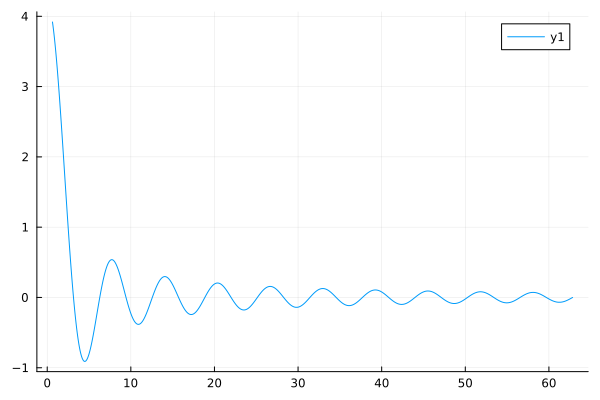

In [4]:
ΔV = 1.
analytic_T_ii = @. ((ΔV * 4π / 3) * (R ^ 3)) * sin(ks * R) / (ks * R)  
plot(ks, analytic_T_ii)

# Computing Numerically

In [6]:
import EnvelopeApproximation.StressEnergyTensorFFT: TensorDirection, surface_integral, SphericalXX, SphericalYY, SphericalZZ, SphericalTrace
tensor_directions = (SphericalTrace(), SphericalXX(), SphericalYY(), SphericalZZ())
n = 10
@time numerical_T = surface_integral(ks, 0.:0., 0.:0., 100, bubbles, tensor_directions, 10, 10, ΔV)

  9.839724 seconds (6.70 M allocations: 2.505 GiB, 10.46% gc time, 74.22% compilation time)


1000×1×1×4 Array{ComplexF64, 4}:
[:, :, 1, 1] =
      3.9185683486164935 + 0.0im
       3.863696106801873 + 0.0im
        3.80416416966788 + 0.0im
       3.740109580859845 + 0.0im
       3.671679515258034 + 0.0im
      3.5990308742640504 + 0.0im
       3.522329854843787 + 0.0im
        3.44175149361949 + 0.0im
      3.3574791873772685 + 0.0im
      3.2697041914257996 + 0.0im
                         ⋮
   -0.032106569354235795 + 0.0im
    -0.02834265787967847 + 0.0im
   -0.024476510709277872 + 0.0im
   -0.020523293300952417 + 0.0im
   -0.016498477704014407 + 0.0im
   -0.012417782135141183 + 0.0im
    -0.00829710972302115 + 0.0im
   -0.004152486659892214 + 0.0im
 -1.6124516188773492e-16 + 0.0im

[:, :, 1, 2] =
      1.341912668289189 + 3.533658797198412e-17im
     1.3307988644124398 + 3.8552365347248385e-17im
      1.318710744571054 + 4.1689042260863835e-17im
     1.3056681657860951 + 4.4740343279272234e-17im
     1.2916925086708124 + 4.770020776707401e-17im
     1.2768066317805098 + 5.0

In [7]:
numerical_ii_integral = numerical_T |> x -> x[:, 1, 1, 1] |> real

1000-element Vector{Float64}:
  3.9185683486164935
  3.863696106801873
  3.80416416966788
  3.740109580859845
  3.671679515258034
  3.5990308742640504
  3.522329854843787
  3.44175149361949
  3.3574791873772685
  3.2697041914257996
  ⋮
 -0.032106569354235795
 -0.02834265787967847
 -0.024476510709277872
 -0.020523293300952417
 -0.016498477704014407
 -0.012417782135141183
 -0.00829710972302115
 -0.004152486659892214
 -1.6124516188773492e-16

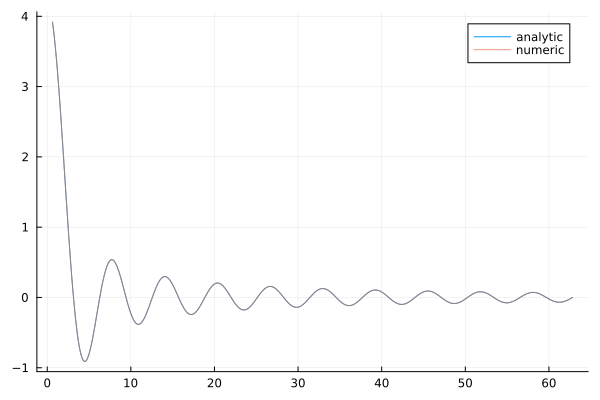

In [9]:
plot(ks, analytic_T_ii, label="analytic")
plot!(ks, numerical_ii_integral, label="numeric", alpha=0.7)

# Study Degree of Realness 

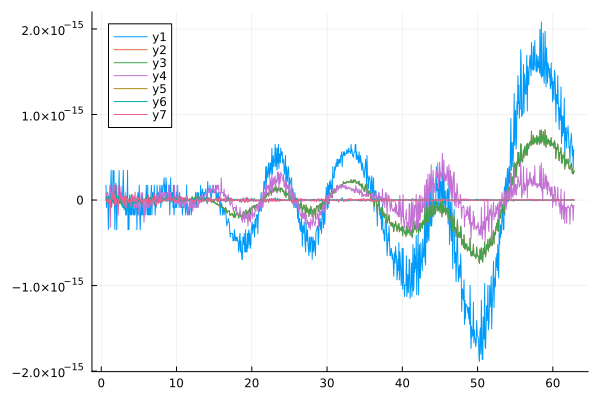

In [6]:
plot(ks, numerical_T_ii .|> imag)

# Study tensor directions

In [7]:
ks

1000-element LinRange{Float64, Int64}:
 0.628319, 0.690584, 0.75285, 0.815116, …, 62.6451, 62.7073, 62.7696, 62.8319

In [12]:
analytical_T_xx = @. 4π / 3 * ΔV  / (ks ^ 3) * (sin(ks * R) - (ks * R) * cos(ks * R))

1000-element Vector{Float64}:
  1.3419126682891864
  1.3307988644124382
  1.3187107445710526
  1.305668165786093
  1.2916925086708098
  1.2768066317805071
  1.2610348228777661
  1.2444027472323822
  1.226937393082527
  1.2086670143904128
  ⋮
 -0.0009553154458466866
 -0.000982598282162563
 -0.0010059716877446616
 -0.0010253609118840107
 -0.0010407068806707184
 -0.0010519663625308405
 -0.0010591120720785387
 -0.0010621327121277536
 -0.001061032953945969

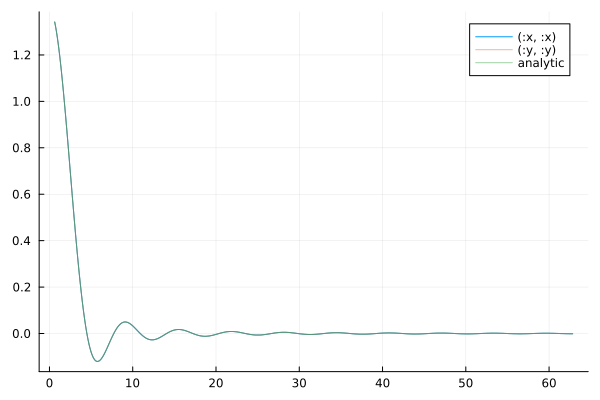

In [13]:
plot(ks, numerical_T[:, 1, 1, 2] .|> real, label="(:x, :x)")
plot!(ks, numerical_T[:, 1, 1, 3] .|> real, label="(:y, :y)", alpha=0.5)
plot!(ks, analytical_T_xx .|> real, label="analytic", alpha = 0.5)

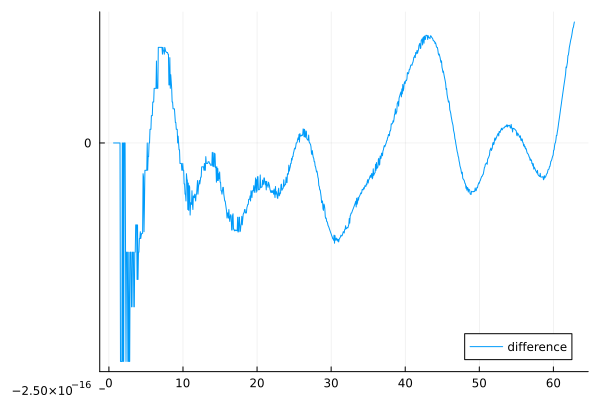

┌ Warning: No strict ticks found
└ @ PlotUtils /home/ben/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ben/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ben/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ben/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ben/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ben/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/ben/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


In [16]:
plot(ks, (numerical_T[:,1, 1, 2] .|> real) - (numerical_T[:, 1, 1, 3] .|> real), label="difference")


## Z, Z

In [17]:
analytic_zz_integral = @.(4π / 3 * ΔV * (1 / (ks ^ 3)) * (2 * ks * R * cos(ks * R) + (R^2 * ks^2 - 2) * sin(ks * R)))

1000-element Vector{Float64}:
  1.2347430120381158
  1.2020983779769918
  1.1667426805257695
  1.128773249287655
  1.0882944979164086
  1.04541761070303
  1.0002602090882504
  0.9529459991547199
  0.9036044012122109
  0.8523701626449691
  ⋮
 -0.030195938462542416
 -0.02637746131535333
 -0.022464567333788533
 -0.018472571477184396
 -0.014417063942672973
 -0.010313849410079502
 -0.006178885578864072
 -0.002028221235636708
  0.002122065907891774

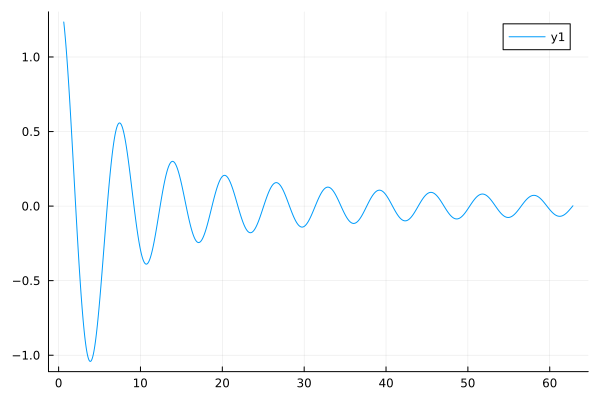

In [18]:
plot(ks, analytic_zz_integral)

In [19]:
numerical_zz_integral = numerical_T[:, 1, 1, 4] |> real

1000-element Vector{Float64}:
  1.2347430120381158
  1.2020983779769938
  1.1667426805257726
  1.1287732492876557
  1.08829449791641
  1.0454176107030315
  1.0002602090882515
  0.9529459991547223
  0.9036044012122127
  0.8523701626449711
  ⋮
 -0.030195938462542402
 -0.026377461315353328
 -0.02246456733378852
 -0.018472571477184382
 -0.014417063942672958
 -0.010313849410079495
 -0.0061788855788640585
 -0.002028221235636696
  0.0021220659078917876

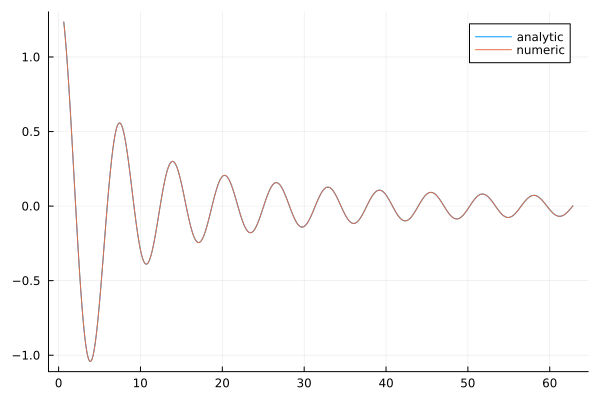

In [20]:
plot(ks, analytic_zz_integral, label="analytic")
plot!(ks, numerical_zz_integral, label="numeric")

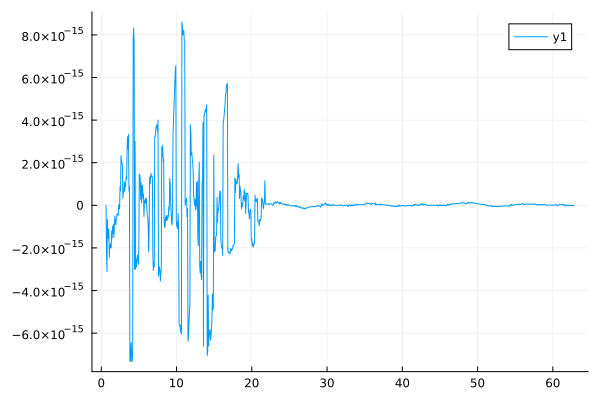

In [21]:
plot(ks, (analytic_zz_integral - numerical_zz_integral))